In [1]:
# setup
%matplotlib inline
import random
import numpy as np
import time
import matplotlib.pyplot as plt
from net import VGG, ResNet18,  SimpleCNN_5x5
from train_test import *

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms

In [2]:
cuda = torch.cuda.is_available()
device = torch.device('cuda:0' if cuda else 'cpu')

# CUDA 기기가 존재한다면, 아래 코드가 CUDA 장치를 출력합니다:

print(device)

cuda:0


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
CIFAR-10 dataset loaded successfully.


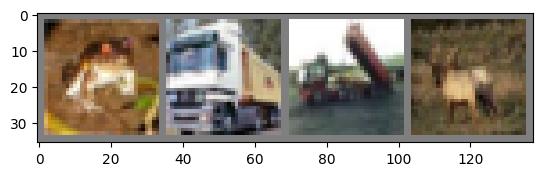

frog  truck truck deer 


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

# Default CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader_base = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=False, num_workers=2)

# CIFAR-10 dataset with shuffled labels
trainset_label_shuffled = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainset_label_shuffled.targets = trainset.targets.copy()
random.shuffle(trainset_label_shuffled.targets)
trainloader_label_shuffled = torch.utils.data.DataLoader(trainset_label_shuffled, batch_size=batch_size,shuffle=False, num_workers=2)

# label noise
def random_label_noise(num_samples, noise_rate, train_set):
    num_noisy = int(noise_rate * num_samples)
    noisy_indices = random.sample(range(num_samples), num_noisy)
    for idx in noisy_indices:
        original = train_set.targets[idx]
        new_label = random.choice([l for l in range(10) if l != original])
        train_set.targets[idx] = new_label

# CIFAR-10 dataset with random labels
# 10% label noise
trainset_label_random_10 = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
random_label_noise(len(trainset_label_random_10), 0.1, trainset_label_random_10)
trainloader_label_random_10 = torch.utils.data.DataLoader(trainset_label_random_10, batch_size=batch_size,shuffle=False, num_workers=2)

# 20% label noise
trainset_label_random_20 = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
random_label_noise(len(trainset_label_random_20), 0.2, trainset_label_random_20)
trainloader_label_random_20 = torch.utils.data.DataLoader(trainset_label_random_20, batch_size=batch_size,shuffle=False, num_workers=2)

# Crop or blur
transform_perturbation = transforms.Compose([
    transforms.RandomResizedCrop(24),
    transforms.GaussianBlur(3),
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
])

trainset_perturbation = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform_perturbation)
trainloader_perturbation = torch.utils.data.DataLoader(trainset_perturbation, batch_size=batch_size,shuffle=False, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

# CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print("CIFAR-10 dataset loaded successfully.")
# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader_base)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [30]:
# Setup
net1 = SimpleCNN_5x5()
net1_shuffled = SimpleCNN_5x5()
net1_random_10 = SimpleCNN_5x5()
net1_random_20 = SimpleCNN_5x5()
net1_perturbation = SimpleCNN_5x5()

net2 = VGG()
net2_shuffled = VGG()
net2_random_10 = VGG()
net2_random_20 = VGG()
net2_perturbation = VGG()

net3 = ResNet18()
net3_shuffled = ResNet18()
net3_random_10 = ResNet18()
net3_random_20 = ResNet18()
net3_perturbation = ResNet18()

if cuda:
    net1.to(device)
    net1_shuffled.to(device)
    net1_random_10.to(device)
    net1_random_20.to(device)
    net1_perturbation.to(device)
    
    net2.to(device)
    net2_shuffled.to(device)
    net2_random_10.to(device)
    net2_random_20.to(device)
    net2_perturbation.to(device)
    
    net3.to(device)
    net3_shuffled.to(device)
    net3_random_10.to(device)
    net3_random_20.to(device)
    net3_perturbation.to(device)
    
epochs = 10
model_labels = ['SimpleCNN', 'VGG', 'ResNet18']


### Baseline model training & comparation
1. Simple CNN
2. VGG
3. ResNet18

SimpleCNN Base
[1,  1000] loss: 2.155
[1,  2000] loss: 1.877
[1,  3000] loss: 1.728
[1,  4000] loss: 1.659
[1,  5000] loss: 1.571
[1,  6000] loss: 1.523
[1,  7000] loss: 1.456
[1,  8000] loss: 1.439
[1,  9000] loss: 1.456
[1, 10000] loss: 1.397
[1, 11000] loss: 1.390
[1, 12000] loss: 1.350
[2,  1000] loss: 1.301
[2,  2000] loss: 1.293
[2,  3000] loss: 1.256
[2,  4000] loss: 1.303
[2,  5000] loss: 1.218
[2,  6000] loss: 1.220
[2,  7000] loss: 1.198
[2,  8000] loss: 1.184
[2,  9000] loss: 1.225
[2, 10000] loss: 1.167
[2, 11000] loss: 1.172
[2, 12000] loss: 1.121
[3,  1000] loss: 1.140
[3,  2000] loss: 1.095
[3,  3000] loss: 1.078
[3,  4000] loss: 1.134
[3,  5000] loss: 1.061
[3,  6000] loss: 1.082
[3,  7000] loss: 1.042
[3,  8000] loss: 1.065
[3,  9000] loss: 1.073
[3, 10000] loss: 1.045
[3, 11000] loss: 1.043
[3, 12000] loss: 0.988
[4,  1000] loss: 1.024
[4,  2000] loss: 0.989
[4,  3000] loss: 0.983
[4,  4000] loss: 1.023
[4,  5000] loss: 0.975
[4,  6000] loss: 0.981
[4,  7000] loss: 0.

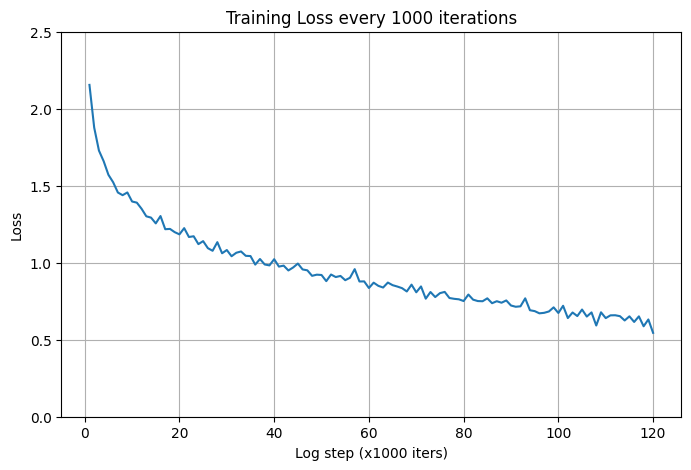

Accuracy of the network on the 10000 test images: 63 %
Accuracy for each class:
plane    car      bird     cat      deer     dog      frog     horse    ship     truck  
 64.6%   65.2%   50.9%   50.1%   58.0%   60.3%   72.8%   68.3%   78.6%   69.7%


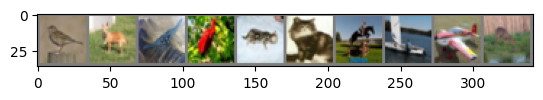

True labels:     bird    dog     plane   bird    cat     cat     horse   ship    plane   deer   
Predicted:       bird    horse   plane   bird    cat     cat     horse   ship    plane   deer   


In [28]:
print("SimpleCNN Base")
net1_loss_base = train_and_test(net1, trainloader_base, testloader, testset, classes, epochs=epochs)

VGG Base
[1,  1000] loss: 2.305
[1,  2000] loss: 2.305
[1,  3000] loss: 2.293
[1,  4000] loss: 2.137
[1,  5000] loss: 2.023
[1,  6000] loss: 1.932
[1,  7000] loss: 1.873
[1,  8000] loss: 1.806
[1,  9000] loss: 1.795
[1, 10000] loss: 1.749
[1, 11000] loss: 1.700
[1, 12000] loss: 1.656
[2,  1000] loss: 1.601
[2,  2000] loss: 1.552
[2,  3000] loss: 1.510
[2,  4000] loss: 1.496
[2,  5000] loss: 1.433
[2,  6000] loss: 1.394
[2,  7000] loss: 1.356
[2,  8000] loss: 1.316
[2,  9000] loss: 1.349
[2, 10000] loss: 1.274
[2, 11000] loss: 1.269
[2, 12000] loss: 1.202
[3,  1000] loss: 1.158
[3,  2000] loss: 1.138
[3,  3000] loss: 1.115
[3,  4000] loss: 1.123
[3,  5000] loss: 1.085
[3,  6000] loss: 1.040
[3,  7000] loss: 1.022
[3,  8000] loss: 0.993
[3,  9000] loss: 1.013
[3, 10000] loss: 0.986
[3, 11000] loss: 0.975
[3, 12000] loss: 0.924
[4,  1000] loss: 0.909
[4,  2000] loss: 0.885
[4,  3000] loss: 0.883
[4,  4000] loss: 0.892
[4,  5000] loss: 0.850
[4,  6000] loss: 0.831
[4,  7000] loss: 0.780
[4

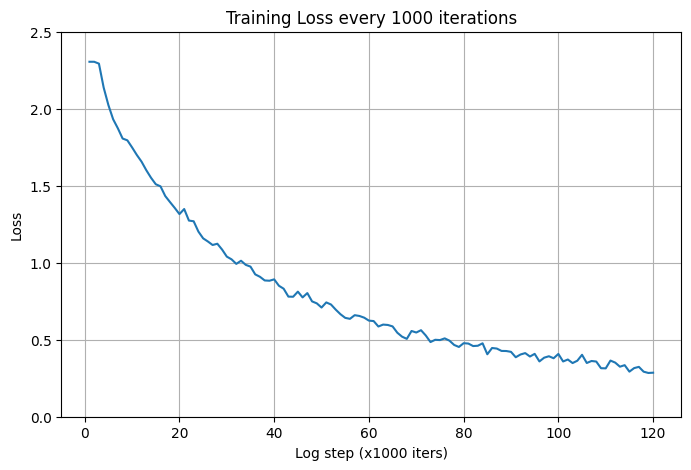

Accuracy of the network on the 10000 test images: 77 %
Accuracy for each class:
plane    car      bird     cat      deer     dog      frog     horse    ship     truck  
 80.2%   90.6%   62.4%   60.1%   78.7%   65.5%   76.3%   87.0%   88.7%   81.7%


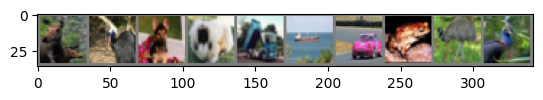

True labels:     deer    bird    dog     dog     truck   ship    car     frog    bird    bird   
Predicted:       bird    horse   horse   dog     truck   ship    truck   frog    deer    bird   


In [7]:
print("VGG Base")
net2_loss_base = train_and_test(net2, trainloader_base, testloader, testset, classes, epochs=epochs)

ResNet18 Base
[1,  1000] loss: 2.296
[1,  2000] loss: 1.939
[1,  3000] loss: 1.791
[1,  4000] loss: 1.714
[1,  5000] loss: 1.610
[1,  6000] loss: 1.500
[1,  7000] loss: 1.432
[1,  8000] loss: 1.325
[1,  9000] loss: 1.314
[1, 10000] loss: 1.215
[1, 11000] loss: 1.164
[1, 12000] loss: 1.093
[2,  1000] loss: 1.023
[2,  2000] loss: 0.990
[2,  3000] loss: 0.936
[2,  4000] loss: 0.945
[2,  5000] loss: 0.897
[2,  6000] loss: 0.888
[2,  7000] loss: 0.833
[2,  8000] loss: 0.791
[2,  9000] loss: 0.836
[2, 10000] loss: 0.760
[2, 11000] loss: 0.750
[2, 12000] loss: 0.714
[3,  1000] loss: 0.678
[3,  2000] loss: 0.660
[3,  3000] loss: 0.634
[3,  4000] loss: 0.645
[3,  5000] loss: 0.605
[3,  6000] loss: 0.615
[3,  7000] loss: 0.570
[3,  8000] loss: 0.551
[3,  9000] loss: 0.598
[3, 10000] loss: 0.518
[3, 11000] loss: 0.509
[3, 12000] loss: 0.498
[4,  1000] loss: 0.479
[4,  2000] loss: 0.446
[4,  3000] loss: 0.438
[4,  4000] loss: 0.440
[4,  5000] loss: 0.423
[4,  6000] loss: 0.435
[4,  7000] loss: 0.3

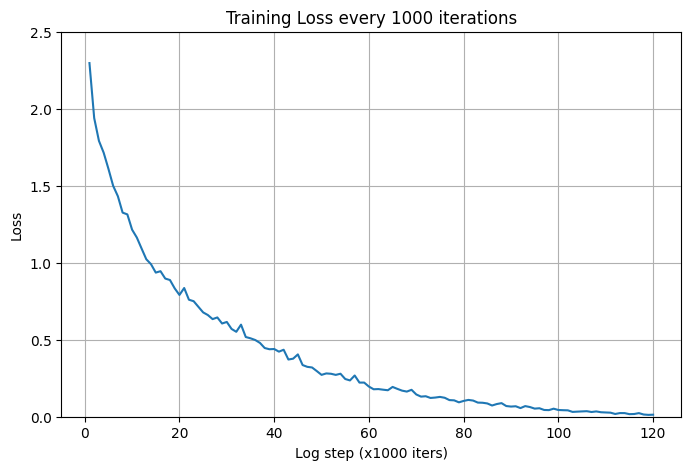

Accuracy of the network on the 10000 test images: 80 %
Accuracy for each class:
plane    car      bird     cat      deer     dog      frog     horse    ship     truck  
 80.6%   89.9%   73.1%   69.2%   78.2%   70.0%   83.9%   85.4%   88.8%   88.9%


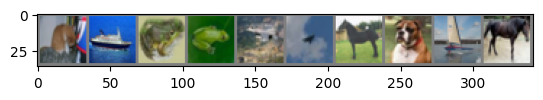

True labels:     cat     ship    frog    frog    plane   plane   horse   dog     ship    horse  
Predicted:       cat     ship    frog    frog    frog    plane   horse   dog     ship    horse  


In [8]:
print("ResNet18 Base")
net3_loss_base = train_and_test(net3, trainloader_base, testloader, testset, classes, epochs=epochs)

In [9]:
# checkpoint. now save trained nets, and also loss logs
torch.save(net1.state_dict(), 'net1_base.pth')
torch.save(net2.state_dict(), 'net2_base.pth')
torch.save(net3.state_dict(), 'net3_base.pth')
torch.save(net1_loss_base, 'net1_loss_base.pth')
torch.save(net2_loss_base, 'net2_loss_base.pth')
torch.save(net3_loss_base, 'net3_loss_base.pth')

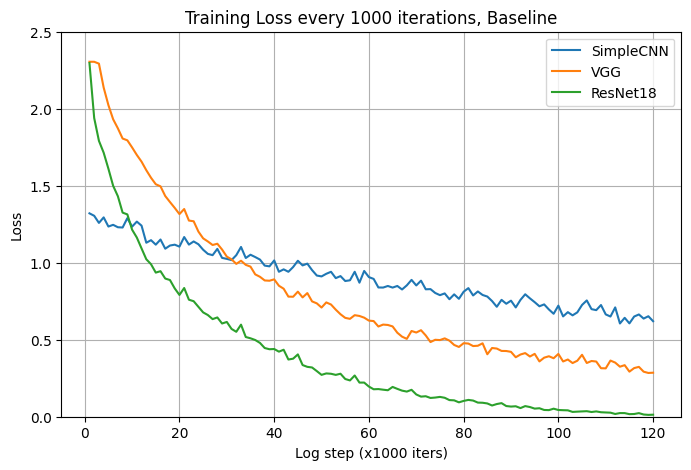

In [10]:
losses = [net1_loss_base, net2_loss_base, net3_loss_base]
draw_loss_graph_1000_iters('Training Loss every 1000 iterations, Baseline',losses,model_labels)

### Random Label Shuffle - Full Label shuffle
Shuffles all labels randomly
(maintains distribution)

SimpleCNN Label Shuffled
[1,  1000] loss: 2.305
[1,  2000] loss: 2.306
[1,  3000] loss: 2.304
[1,  4000] loss: 2.304
[1,  5000] loss: 2.306
[1,  6000] loss: 2.305
[1,  7000] loss: 2.305
[1,  8000] loss: 2.305
[1,  9000] loss: 2.304
[1, 10000] loss: 2.304
[1, 11000] loss: 2.305
[1, 12000] loss: 2.305
[2,  1000] loss: 2.304
[2,  2000] loss: 2.305
[2,  3000] loss: 2.304
[2,  4000] loss: 2.304
[2,  5000] loss: 2.305
[2,  6000] loss: 2.304
[2,  7000] loss: 2.304
[2,  8000] loss: 2.305
[2,  9000] loss: 2.304
[2, 10000] loss: 2.304
[2, 11000] loss: 2.304
[2, 12000] loss: 2.304
[3,  1000] loss: 2.304
[3,  2000] loss: 2.305
[3,  3000] loss: 2.303
[3,  4000] loss: 2.304
[3,  5000] loss: 2.305
[3,  6000] loss: 2.304
[3,  7000] loss: 2.304
[3,  8000] loss: 2.305
[3,  9000] loss: 2.304
[3, 10000] loss: 2.304
[3, 11000] loss: 2.304
[3, 12000] loss: 2.304
[4,  1000] loss: 2.304
[4,  2000] loss: 2.304
[4,  3000] loss: 2.303
[4,  4000] loss: 2.303
[4,  5000] loss: 2.305
[4,  6000] loss: 2.304
[4,  7000

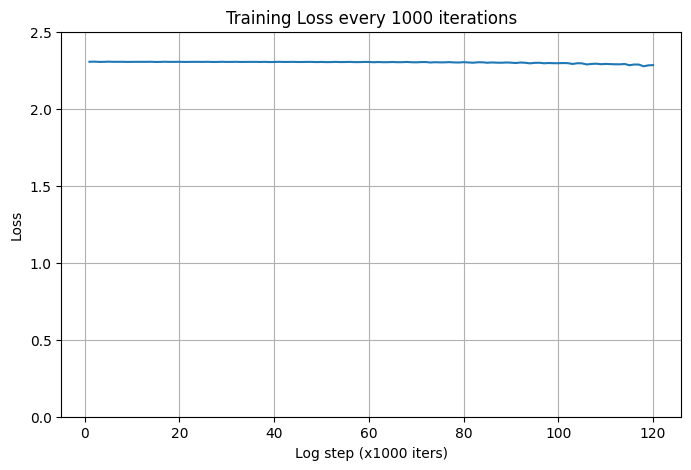

Accuracy of the network on the 10000 test images: 10 %
Accuracy for each class:
plane    car      bird     cat      deer     dog      frog     horse    ship     truck  
 17.6%   14.5%    0.4%    3.7%    1.5%    5.6%   19.2%    2.9%   11.0%   26.7%


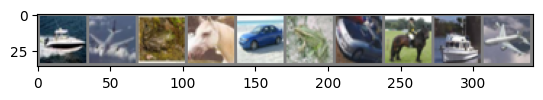

True labels:     ship    plane   frog    horse   car     frog    car     horse   ship    plane  
Predicted:       cat     car     frog    car     car     car     dog     plane   truck   plane  


In [11]:
print("SimpleCNN Label Shuffled")
net1_loss_shuffled = train_and_test(net1_shuffled, trainloader_label_shuffled, testloader, testset, classes, epochs=epochs)

VGG Label Shuffled
[1,  1000] loss: 2.305
[1,  2000] loss: 2.306
[1,  3000] loss: 2.304
[1,  4000] loss: 2.305
[1,  5000] loss: 2.306
[1,  6000] loss: 2.305
[1,  7000] loss: 2.305
[1,  8000] loss: 2.305
[1,  9000] loss: 2.305
[1, 10000] loss: 2.304
[1, 11000] loss: 2.305
[1, 12000] loss: 2.305
[2,  1000] loss: 2.305
[2,  2000] loss: 2.305
[2,  3000] loss: 2.304
[2,  4000] loss: 2.304
[2,  5000] loss: 2.305
[2,  6000] loss: 2.304
[2,  7000] loss: 2.304
[2,  8000] loss: 2.305
[2,  9000] loss: 2.304
[2, 10000] loss: 2.304
[2, 11000] loss: 2.305
[2, 12000] loss: 2.304
[3,  1000] loss: 2.304
[3,  2000] loss: 2.305
[3,  3000] loss: 2.304
[3,  4000] loss: 2.304
[3,  5000] loss: 2.305
[3,  6000] loss: 2.304
[3,  7000] loss: 2.304
[3,  8000] loss: 2.305
[3,  9000] loss: 2.304
[3, 10000] loss: 2.304
[3, 11000] loss: 2.304
[3, 12000] loss: 2.305
[4,  1000] loss: 2.304
[4,  2000] loss: 2.305
[4,  3000] loss: 2.304
[4,  4000] loss: 2.304
[4,  5000] loss: 2.305
[4,  6000] loss: 2.304
[4,  7000] loss

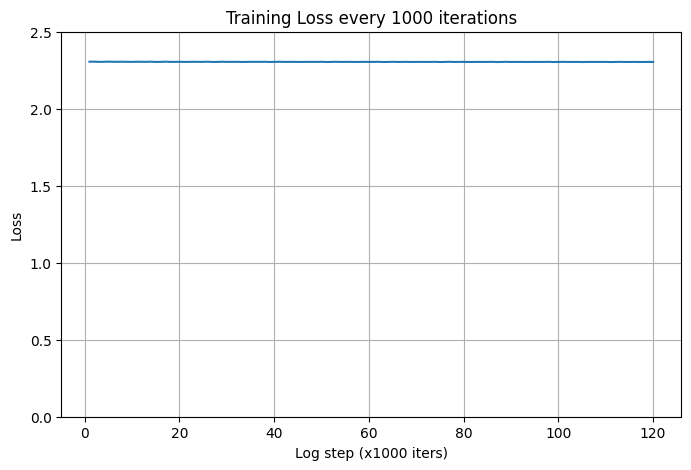

Accuracy of the network on the 10000 test images: 10 %
Accuracy for each class:
plane    car      bird     cat      deer     dog      frog     horse    ship     truck  
  0.0%    0.2%    0.0%    0.0%    0.0%    0.0%    0.0%    0.0%    0.0%   99.9%


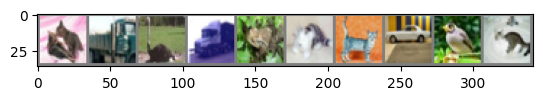

True labels:     cat     truck   bird    truck   frog    cat     cat     car     bird    cat    
Predicted:       truck   truck   truck   truck   truck   truck   truck   truck   truck   truck  


In [12]:
print("VGG Label Shuffled")
net2_loss_shuffled = train_and_test(net2_shuffled, trainloader_label_shuffled, testloader, testset, classes, epochs=epochs)

ResNet18 Label Shuffled
[1,  1000] loss: 2.535
[1,  2000] loss: 2.352
[1,  3000] loss: 2.328
[1,  4000] loss: 2.319
[1,  5000] loss: 2.317
[1,  6000] loss: 2.313
[1,  7000] loss: 2.310
[1,  8000] loss: 2.308
[1,  9000] loss: 2.308
[1, 10000] loss: 2.308
[1, 11000] loss: 2.307
[1, 12000] loss: 2.307
[2,  1000] loss: 2.307
[2,  2000] loss: 2.306
[2,  3000] loss: 2.306
[2,  4000] loss: 2.306
[2,  5000] loss: 2.307
[2,  6000] loss: 2.305
[2,  7000] loss: 2.305
[2,  8000] loss: 2.305
[2,  9000] loss: 2.304
[2, 10000] loss: 2.305
[2, 11000] loss: 2.305
[2, 12000] loss: 2.306
[3,  1000] loss: 2.305
[3,  2000] loss: 2.305
[3,  3000] loss: 2.304
[3,  4000] loss: 2.305
[3,  5000] loss: 2.306
[3,  6000] loss: 2.304
[3,  7000] loss: 2.305
[3,  8000] loss: 2.305
[3,  9000] loss: 2.304
[3, 10000] loss: 2.304
[3, 11000] loss: 2.305
[3, 12000] loss: 2.305
[4,  1000] loss: 2.305
[4,  2000] loss: 2.305
[4,  3000] loss: 2.304
[4,  4000] loss: 2.304
[4,  5000] loss: 2.305
[4,  6000] loss: 2.304
[4,  7000]

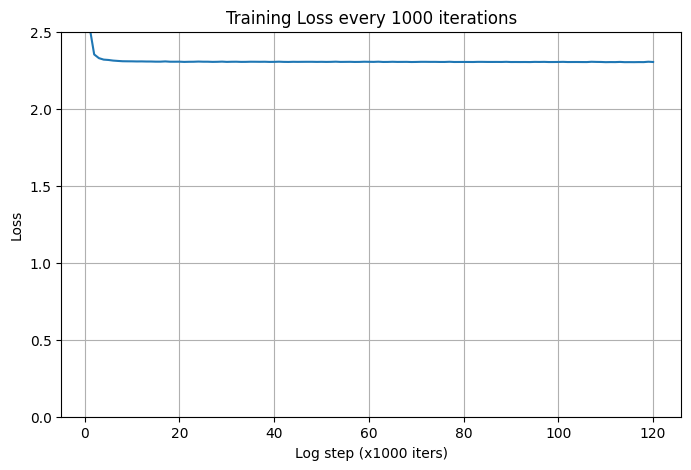

Accuracy of the network on the 10000 test images: 9 %
Accuracy for each class:
plane    car      bird     cat      deer     dog      frog     horse    ship     truck  
  0.2%   65.0%    0.0%    0.0%    0.0%    7.7%    1.3%    0.0%    7.5%   10.8%


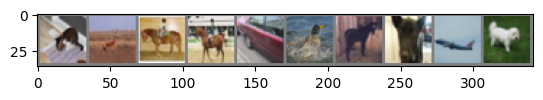

True labels:     cat     deer    horse   horse   car     bird    horse   dog     plane   dog    
Predicted:       car     car     ship    car     car     car     car     car     car     truck  


In [13]:
print("ResNet18 Label Shuffled")
net3_loss_shuffled = train_and_test(net3_shuffled, trainloader_label_shuffled, testloader, testset, classes, epochs=epochs)

In [14]:
# checkpoint. now save trained nets, and also loss logs
torch.save(net1_shuffled.state_dict(), 'net1_shuffled.pth')
torch.save(net2_shuffled.state_dict(), 'net2_shuffled.pth')
torch.save(net3_shuffled.state_dict(), 'net3_shuffled.pth')
torch.save(net1_loss_shuffled, 'net1_loss_shuffled.pth')
torch.save(net2_loss_shuffled, 'net2_loss_shuffled.pth')
torch.save(net3_loss_shuffled, 'net3_loss_shuffled.pth')

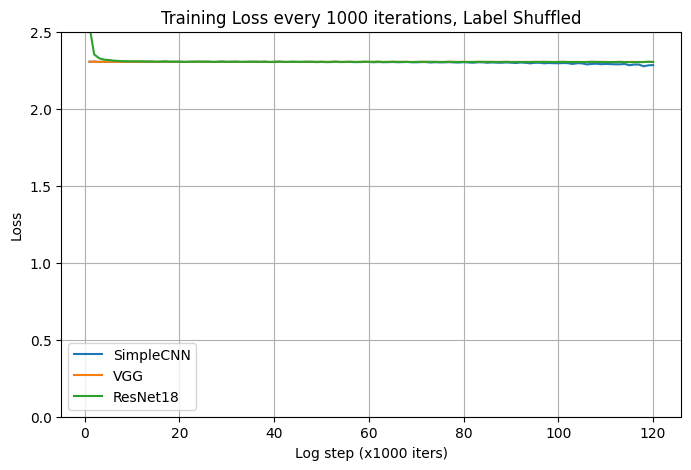

In [15]:
losses = [net1_loss_shuffled, net2_loss_shuffled, net3_loss_shuffled]
draw_loss_graph_1000_iters('Training Loss every 1000 iterations, Label Shuffled', losses,model_labels)

### Random Label Noise - 10% False Label
10% of training data has wrong label (random false class)

SimpleCNN label noise 10%
[1,  1000] loss: 2.199
[1,  2000] loss: 2.008
[1,  3000] loss: 1.886
[1,  4000] loss: 1.827
[1,  5000] loss: 1.768
[1,  6000] loss: 1.738
[1,  7000] loss: 1.694
[1,  8000] loss: 1.675
[1,  9000] loss: 1.701
[1, 10000] loss: 1.650
[1, 11000] loss: 1.643
[1, 12000] loss: 1.605
[2,  1000] loss: 1.590
[2,  2000] loss: 1.557
[2,  3000] loss: 1.539
[2,  4000] loss: 1.563
[2,  5000] loss: 1.530
[2,  6000] loss: 1.524
[2,  7000] loss: 1.493
[2,  8000] loss: 1.482
[2,  9000] loss: 1.525
[2, 10000] loss: 1.479
[2, 11000] loss: 1.479
[2, 12000] loss: 1.452
[3,  1000] loss: 1.447
[3,  2000] loss: 1.434
[3,  3000] loss: 1.404
[3,  4000] loss: 1.428
[3,  5000] loss: 1.407
[3,  6000] loss: 1.419
[3,  7000] loss: 1.373
[3,  8000] loss: 1.363
[3,  9000] loss: 1.411
[3, 10000] loss: 1.370
[3, 11000] loss: 1.366
[3, 12000] loss: 1.325
[4,  1000] loss: 1.338
[4,  2000] loss: 1.325
[4,  3000] loss: 1.318
[4,  4000] loss: 1.331
[4,  5000] loss: 1.326
[4,  6000] loss: 1.324
[4,  700

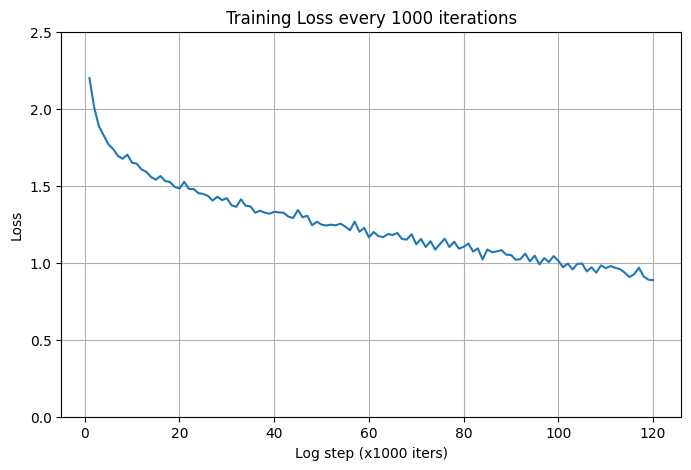

Accuracy of the network on the 10000 test images: 59 %
Accuracy for each class:
plane    car      bird     cat      deer     dog      frog     horse    ship     truck  
 63.5%   74.5%   50.4%   48.0%   48.3%   43.2%   67.1%   66.4%   70.8%   63.7%


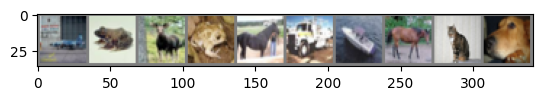

True labels:     plane   frog    deer    frog    horse   truck   ship    horse   cat     dog    
Predicted:       deer    frog    cat     frog    horse   truck   ship    horse   horse   cat    


In [16]:
print("SimpleCNN label noise 10%")
net1_loss_random_10 = train_and_test(net1_random_10, trainloader_label_random_10, testloader, testset, classes, epochs=epochs)

VGG label noise 10%
[1,  1000] loss: 2.304
[1,  2000] loss: 2.306
[1,  3000] loss: 2.305
[1,  4000] loss: 2.305
[1,  5000] loss: 2.304
[1,  6000] loss: 2.229
[1,  7000] loss: 2.123
[1,  8000] loss: 2.048
[1,  9000] loss: 2.029
[1, 10000] loss: 1.960
[1, 11000] loss: 1.932
[1, 12000] loss: 1.885
[2,  1000] loss: 1.869
[2,  2000] loss: 1.831
[2,  3000] loss: 1.807
[2,  4000] loss: 1.785
[2,  5000] loss: 1.749
[2,  6000] loss: 1.713
[2,  7000] loss: 1.682
[2,  8000] loss: 1.653
[2,  9000] loss: 1.671
[2, 10000] loss: 1.625
[2, 11000] loss: 1.597
[2, 12000] loss: 1.551
[3,  1000] loss: 1.535
[3,  2000] loss: 1.514
[3,  3000] loss: 1.479
[3,  4000] loss: 1.495
[3,  5000] loss: 1.487
[3,  6000] loss: 1.454
[3,  7000] loss: 1.412
[3,  8000] loss: 1.380
[3,  9000] loss: 1.422
[3, 10000] loss: 1.387
[3, 11000] loss: 1.383
[3, 12000] loss: 1.347
[4,  1000] loss: 1.333
[4,  2000] loss: 1.330
[4,  3000] loss: 1.300
[4,  4000] loss: 1.309
[4,  5000] loss: 1.304
[4,  6000] loss: 1.283
[4,  7000] los

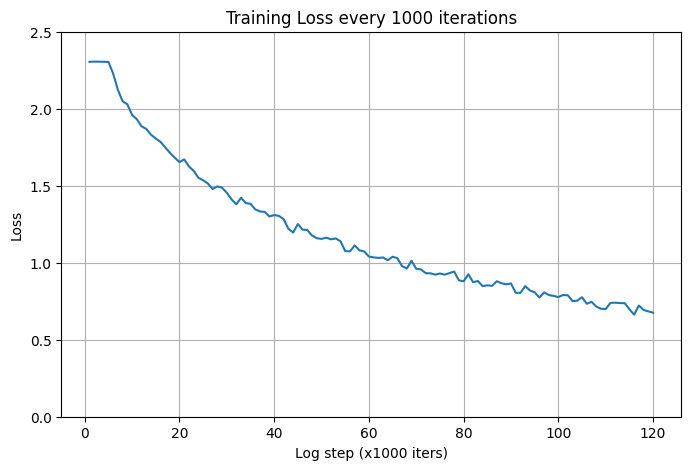

Accuracy of the network on the 10000 test images: 71 %
Accuracy for each class:
plane    car      bird     cat      deer     dog      frog     horse    ship     truck  
 73.5%   83.7%   62.4%   59.0%   66.1%   59.6%   75.5%   74.3%   82.4%   78.7%


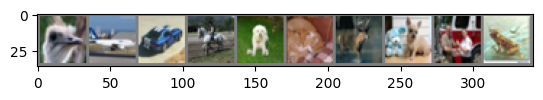

True labels:     bird    plane   car     horse   dog     cat     deer    dog     truck   frog   
Predicted:       dog     plane   car     horse   dog     cat     cat     cat     dog     plane  


In [17]:
print("VGG label noise 10%")
net2_loss_random_10 = train_and_test(net2_random_10, trainloader_label_random_10, testloader, testset, classes, epochs=epochs)

ResNet18 label noise 10%
[1,  1000] loss: 2.387
[1,  2000] loss: 2.081
[1,  3000] loss: 1.983
[1,  4000] loss: 1.919
[1,  5000] loss: 1.851
[1,  6000] loss: 1.795
[1,  7000] loss: 1.742
[1,  8000] loss: 1.676
[1,  9000] loss: 1.695
[1, 10000] loss: 1.617
[1, 11000] loss: 1.573
[1, 12000] loss: 1.524
[2,  1000] loss: 1.484
[2,  2000] loss: 1.465
[2,  3000] loss: 1.408
[2,  4000] loss: 1.425
[2,  5000] loss: 1.399
[2,  6000] loss: 1.373
[2,  7000] loss: 1.322
[2,  8000] loss: 1.282
[2,  9000] loss: 1.341
[2, 10000] loss: 1.256
[2, 11000] loss: 1.259
[2, 12000] loss: 1.213
[3,  1000] loss: 1.201
[3,  2000] loss: 1.189
[3,  3000] loss: 1.160
[3,  4000] loss: 1.178
[3,  5000] loss: 1.159
[3,  6000] loss: 1.144
[3,  7000] loss: 1.100
[3,  8000] loss: 1.071
[3,  9000] loss: 1.127
[3, 10000] loss: 1.043
[3, 11000] loss: 1.062
[3, 12000] loss: 1.022
[4,  1000] loss: 1.022
[4,  2000] loss: 1.003
[4,  3000] loss: 0.988
[4,  4000] loss: 1.010
[4,  5000] loss: 0.980
[4,  6000] loss: 0.968
[4,  7000

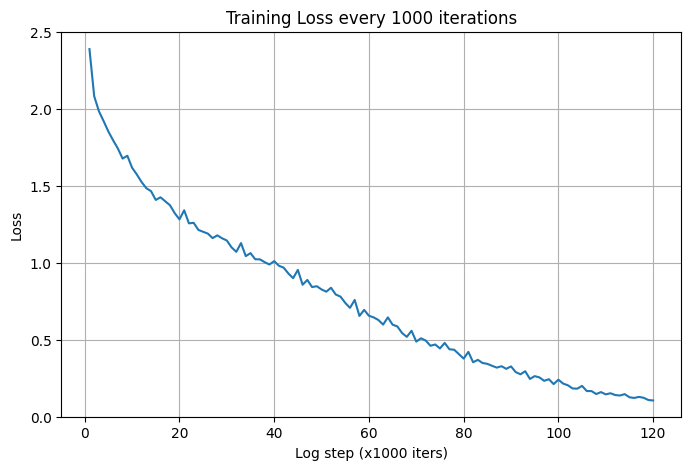

Accuracy of the network on the 10000 test images: 71 %
Accuracy for each class:
plane    car      bird     cat      deer     dog      frog     horse    ship     truck  
 73.7%   83.1%   60.5%   55.0%   67.3%   58.5%   80.4%   74.2%   83.0%   84.0%


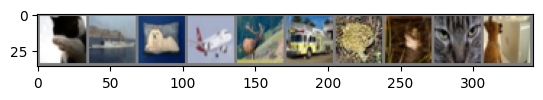

True labels:     cat     ship    dog     plane   deer    truck   frog    frog    cat     dog    
Predicted:       dog     ship    dog     ship    deer    truck   frog    cat     cat     dog    


In [18]:
print("ResNet18 label noise 10%")
net3_loss_random_10 = train_and_test(net3_random_10, trainloader_label_random_10, testloader, testset, classes, epochs=epochs)

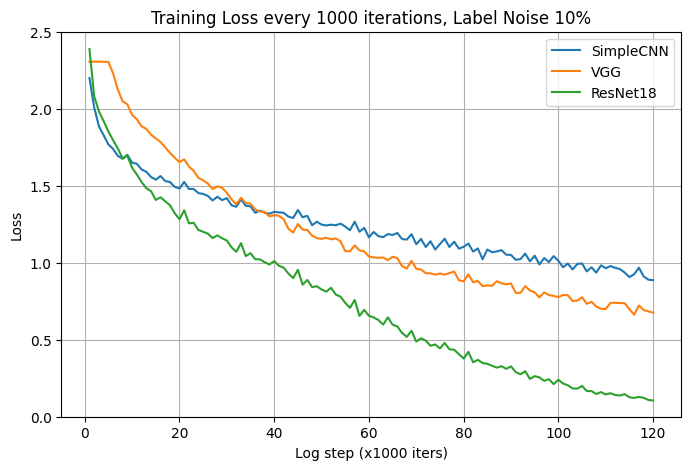

In [19]:
losses = [net1_loss_random_10, net2_loss_random_10, net3_loss_random_10]
draw_loss_graph_1000_iters('Training Loss every 1000 iterations, Label Noise 10%', losses,model_labels)

### Random Label Noise - 20% False Label
20% of training data has wrong label (random false class)

SimpleCNN label noise 20%
[1,  1000] loss: 2.230
[1,  2000] loss: 2.118
[1,  3000] loss: 2.029
[1,  4000] loss: 1.997
[1,  5000] loss: 1.950
[1,  6000] loss: 1.913
[1,  7000] loss: 1.867
[1,  8000] loss: 1.869
[1,  9000] loss: 1.865
[1, 10000] loss: 1.838
[1, 11000] loss: 1.827
[1, 12000] loss: 1.807
[2,  1000] loss: 1.803
[2,  2000] loss: 1.784
[2,  3000] loss: 1.738
[2,  4000] loss: 1.770
[2,  5000] loss: 1.744
[2,  6000] loss: 1.720
[2,  7000] loss: 1.702
[2,  8000] loss: 1.698
[2,  9000] loss: 1.709
[2, 10000] loss: 1.694
[2, 11000] loss: 1.684
[2, 12000] loss: 1.663
[3,  1000] loss: 1.676
[3,  2000] loss: 1.670
[3,  3000] loss: 1.625
[3,  4000] loss: 1.652
[3,  5000] loss: 1.643
[3,  6000] loss: 1.611
[3,  7000] loss: 1.601
[3,  8000] loss: 1.583
[3,  9000] loss: 1.600
[3, 10000] loss: 1.598
[3, 11000] loss: 1.592
[3, 12000] loss: 1.579
[4,  1000] loss: 1.591
[4,  2000] loss: 1.589
[4,  3000] loss: 1.538
[4,  4000] loss: 1.576
[4,  5000] loss: 1.552
[4,  6000] loss: 1.540
[4,  700

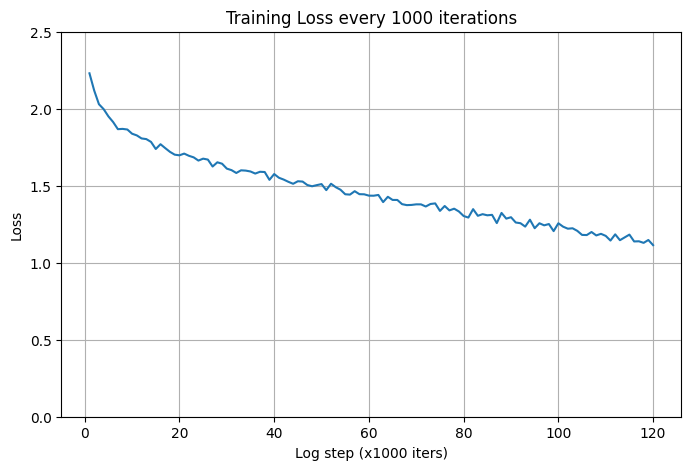

Accuracy of the network on the 10000 test images: 53 %
Accuracy for each class:
plane    car      bird     cat      deer     dog      frog     horse    ship     truck  
 54.6%   68.0%   34.0%   37.7%   47.9%   45.3%   55.9%   59.1%   77.4%   57.4%


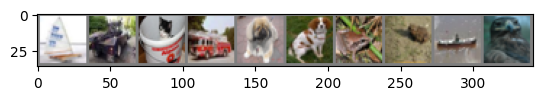

True labels:     ship    truck   cat     truck   dog     dog     frog    frog    ship    bird   
Predicted:       ship    car     ship    truck   dog     horse   frog    bird    ship    ship   


In [20]:
print("SimpleCNN label noise 20%")
net1_loss_random_20 = train_and_test(net1_random_20, trainloader_label_random_20, testloader, testset, classes, epochs=epochs)

VGG label noise 20%
[1,  1000] loss: 2.304
[1,  2000] loss: 2.305
[1,  3000] loss: 2.305
[1,  4000] loss: 2.305
[1,  5000] loss: 2.291
[1,  6000] loss: 2.207
[1,  7000] loss: 2.161
[1,  8000] loss: 2.121
[1,  9000] loss: 2.104
[1, 10000] loss: 2.071
[1, 11000] loss: 2.041
[1, 12000] loss: 2.016
[2,  1000] loss: 2.010
[2,  2000] loss: 1.983
[2,  3000] loss: 1.957
[2,  4000] loss: 1.970
[2,  5000] loss: 1.941
[2,  6000] loss: 1.916
[2,  7000] loss: 1.874
[2,  8000] loss: 1.872
[2,  9000] loss: 1.868
[2, 10000] loss: 1.843
[2, 11000] loss: 1.827
[2, 12000] loss: 1.810
[3,  1000] loss: 1.809
[3,  2000] loss: 1.775
[3,  3000] loss: 1.742
[3,  4000] loss: 1.768
[3,  5000] loss: 1.755
[3,  6000] loss: 1.715
[3,  7000] loss: 1.694
[3,  8000] loss: 1.662
[3,  9000] loss: 1.685
[3, 10000] loss: 1.652
[3, 11000] loss: 1.661
[3, 12000] loss: 1.629
[4,  1000] loss: 1.643
[4,  2000] loss: 1.641
[4,  3000] loss: 1.584
[4,  4000] loss: 1.599
[4,  5000] loss: 1.606
[4,  6000] loss: 1.563
[4,  7000] los

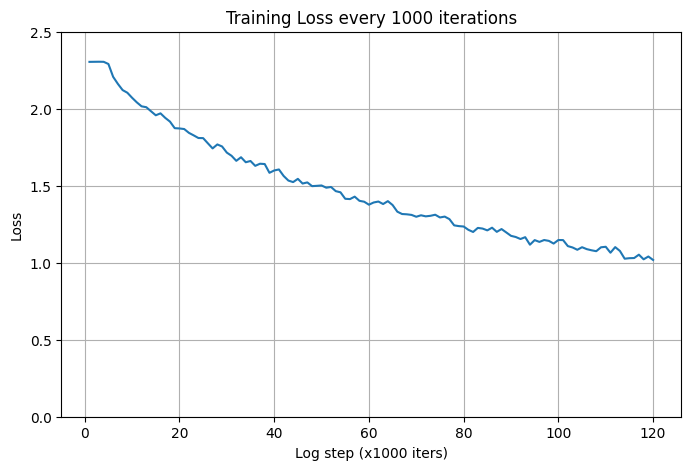

Accuracy of the network on the 10000 test images: 67 %
Accuracy for each class:
plane    car      bird     cat      deer     dog      frog     horse    ship     truck  
 61.2%   86.2%   44.4%   44.2%   63.6%   57.3%   75.7%   81.5%   79.9%   81.3%


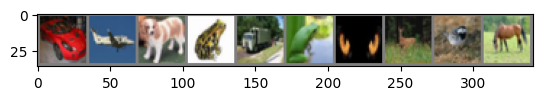

True labels:     car     plane   dog     frog    truck   frog    cat     deer    bird    horse  
Predicted:       car     plane   dog     frog    truck   frog    frog    deer    bird    horse  


In [21]:
print("VGG label noise 20%")
net2_loss_random_20 = train_and_test(net2_random_20, trainloader_label_random_20, testloader, testset, classes, epochs=epochs)

ResNet18 label noise 20%
[1,  1000] loss: 2.439
[1,  2000] loss: 2.185
[1,  3000] loss: 2.109
[1,  4000] loss: 2.071
[1,  5000] loss: 2.014
[1,  6000] loss: 1.965
[1,  7000] loss: 1.933
[1,  8000] loss: 1.887
[1,  9000] loss: 1.875
[1, 10000] loss: 1.842
[1, 11000] loss: 1.817
[1, 12000] loss: 1.785
[2,  1000] loss: 1.760
[2,  2000] loss: 1.740
[2,  3000] loss: 1.685
[2,  4000] loss: 1.706
[2,  5000] loss: 1.674
[2,  6000] loss: 1.639
[2,  7000] loss: 1.624
[2,  8000] loss: 1.590
[2,  9000] loss: 1.594
[2, 10000] loss: 1.560
[2, 11000] loss: 1.558
[2, 12000] loss: 1.524
[3,  1000] loss: 1.529
[3,  2000] loss: 1.506
[3,  3000] loss: 1.477
[3,  4000] loss: 1.496
[3,  5000] loss: 1.478
[3,  6000] loss: 1.448
[3,  7000] loss: 1.424
[3,  8000] loss: 1.410
[3,  9000] loss: 1.417
[3, 10000] loss: 1.379
[3, 11000] loss: 1.388
[3, 12000] loss: 1.358
[4,  1000] loss: 1.367
[4,  2000] loss: 1.349
[4,  3000] loss: 1.323
[4,  4000] loss: 1.347
[4,  5000] loss: 1.325
[4,  6000] loss: 1.303
[4,  7000

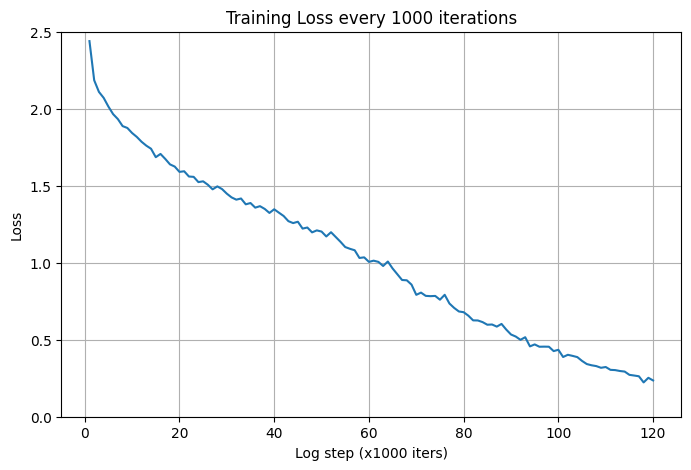

Accuracy of the network on the 10000 test images: 60 %
Accuracy for each class:
plane    car      bird     cat      deer     dog      frog     horse    ship     truck  
 42.0%   65.4%   51.9%   51.5%   53.4%   63.0%   62.1%   72.4%   70.6%   70.8%


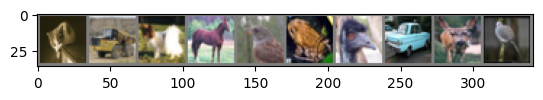

True labels:     cat     truck   dog     horse   bird    frog    bird    car     deer    bird   
Predicted:       dog     dog     plane   horse   dog     frog    cat     frog    horse   bird   


In [22]:
print("ResNet18 label noise 20%")
net3_loss_random_20 = train_and_test(net3_random_20, trainloader_label_random_20, testloader, testset, classes, epochs=epochs)

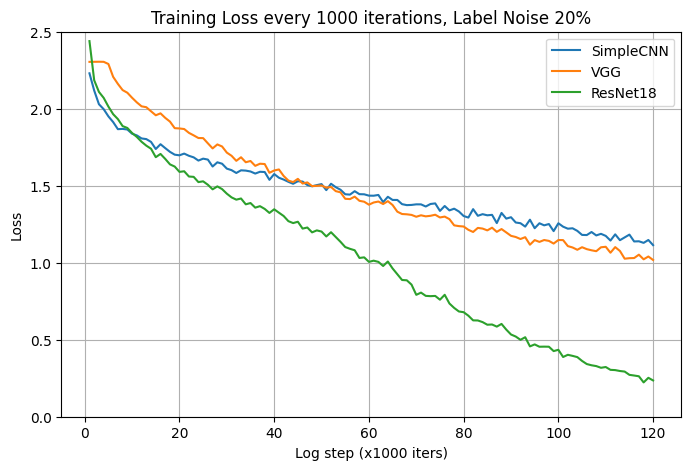

In [23]:
losses = [net1_loss_random_20, net2_loss_random_20, net3_loss_random_20]
draw_loss_graph_1000_iters('Training Loss every 1000 iterations, Label Noise 20%', losses,model_labels)

### Perturbation
- crop(24x24) and resize
- apply gaussian blur

SimpleCNN perturbation
[1,  1000] loss: 2.229
[1,  2000] loss: 2.089
[1,  3000] loss: 2.016
[1,  4000] loss: 1.950
[1,  5000] loss: 1.912
[1,  6000] loss: 1.864
[1,  7000] loss: 1.839
[1,  8000] loss: 1.812
[1,  9000] loss: 1.842
[1, 10000] loss: 1.848
[1, 11000] loss: 1.821
[1, 12000] loss: 1.812
[2,  1000] loss: 1.782
[2,  2000] loss: 1.763
[2,  3000] loss: 1.764
[2,  4000] loss: 1.768
[2,  5000] loss: 1.742
[2,  6000] loss: 1.750
[2,  7000] loss: 1.715
[2,  8000] loss: 1.728
[2,  9000] loss: 1.742
[2, 10000] loss: 1.721
[2, 11000] loss: 1.756
[2, 12000] loss: 1.717
[3,  1000] loss: 1.684
[3,  2000] loss: 1.686
[3,  3000] loss: 1.695
[3,  4000] loss: 1.709
[3,  5000] loss: 1.686
[3,  6000] loss: 1.694
[3,  7000] loss: 1.678
[3,  8000] loss: 1.670
[3,  9000] loss: 1.709
[3, 10000] loss: 1.688
[3, 11000] loss: 1.685
[3, 12000] loss: 1.668
[4,  1000] loss: 1.639
[4,  2000] loss: 1.654
[4,  3000] loss: 1.653
[4,  4000] loss: 1.657
[4,  5000] loss: 1.645
[4,  6000] loss: 1.644
[4,  7000] 

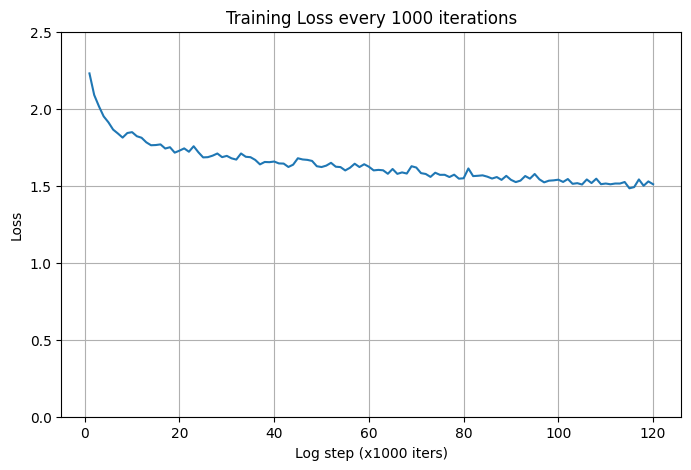

Accuracy of the network on the 10000 test images: 52 %
Accuracy for each class:
plane    car      bird     cat      deer     dog      frog     horse    ship     truck  
 59.7%   71.5%   30.8%   31.4%   29.8%   24.1%   86.6%   55.7%   73.6%   57.3%


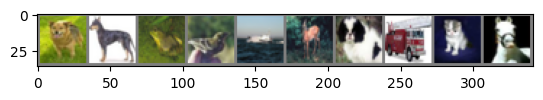

True labels:     dog     dog     frog    bird    ship    deer    dog     truck   cat     horse  
Predicted:       frog    horse   frog    frog    ship    deer    dog     truck   dog     dog    


In [31]:
print("SimpleCNN perturbation")
net1_loss_perturbation = train_and_test(net1, trainloader_perturbation, testloader, testset, classes, epochs=epochs)

In [ ]:
print("VGG perturbation")
net2_loss_perturbation = train_and_test(net2, trainloader_perturbation, testloader, testset, classes, epochs=epochs)

VGG perturbation
[1,  1000] loss: 2.305
[1,  2000] loss: 2.305
[1,  3000] loss: 2.305
[1,  4000] loss: 2.304
[1,  5000] loss: 2.306
[1,  6000] loss: 2.273
[1,  7000] loss: 2.158
[1,  8000] loss: 2.111
[1,  9000] loss: 2.085
[1, 10000] loss: 2.056
[1, 11000] loss: 2.040
[1, 12000] loss: 2.020
[2,  1000] loss: 2.001
[2,  2000] loss: 1.969
[2,  3000] loss: 1.956
[2,  4000] loss: 1.964
[2,  5000] loss: 1.910


ResNet18 perturbation
[1,  1000] loss: 1.768
[1,  2000] loss: 1.424
[1,  3000] loss: 1.381
[1,  4000] loss: 1.325
[1,  5000] loss: 1.293
[1,  6000] loss: 1.272
[1,  7000] loss: 1.218
[1,  8000] loss: 1.226
[1,  9000] loss: 1.246
[1, 10000] loss: 1.218
[1, 11000] loss: 1.198
[1, 12000] loss: 1.168
[2,  1000] loss: 1.160
[2,  2000] loss: 1.118
[2,  3000] loss: 1.142
[2,  4000] loss: 1.143
[2,  5000] loss: 1.115
[2,  6000] loss: 1.102
[2,  7000] loss: 1.051
[2,  8000] loss: 1.079
[2,  9000] loss: 1.097
[2, 10000] loss: 1.085
[2, 11000] loss: 1.055
[2, 12000] loss: 1.061
[3,  1000] loss: 1.038
[3,  2000] loss: 1.046
[3,  3000] loss: 1.007
[3,  4000] loss: 1.022
[3,  5000] loss: 1.039
[3,  6000] loss: 1.010
[3,  7000] loss: 1.005
[3,  8000] loss: 1.008
[3,  9000] loss: 1.027
[3, 10000] loss: 0.978
[3, 11000] loss: 1.010
[3, 12000] loss: 0.983
[4,  1000] loss: 0.978
[4,  2000] loss: 0.969
[4,  3000] loss: 0.961
[4,  4000] loss: 0.966
[4,  5000] loss: 0.985
[4,  6000] loss: 0.954
[4,  7000] l

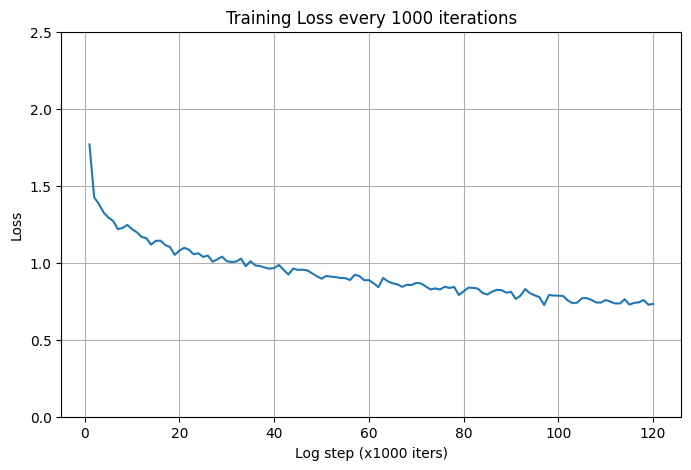

Accuracy of the network on the 10000 test images: 79 %
Accuracy for each class:
plane    car      bird     cat      deer     dog      frog     horse    ship     truck  
 80.3%   83.1%   77.1%   72.2%   80.1%   55.0%   82.7%   86.3%   92.8%   85.3%


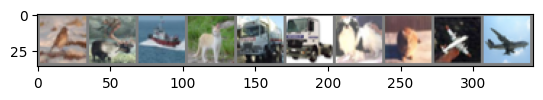

True labels:     bird    deer    ship    cat     truck   truck   dog     cat     plane   plane  
Predicted:       bird    deer    ship    dog     truck   truck   dog     cat     plane   plane  


In [ ]:
print("ResNet18 perturbation")
net3_loss_perturbation = train_and_test(net3, trainloader_perturbation, testloader, testset, classes, epochs=epochs)

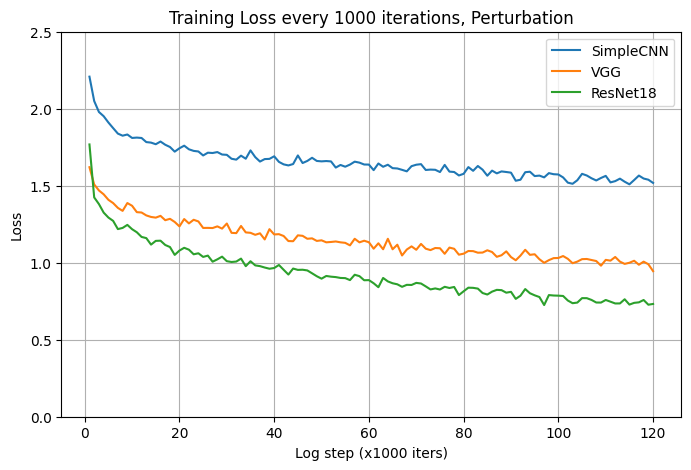

In [ ]:
losses = [net1_loss_perturbation, net2_loss_perturbation, net3_loss_perturbation]
draw_loss_graph_1000_iters('Training Loss every 1000 iterations, Perturbation', losses,model_labels)

### Comparation for Each Model
Baseline / Shuffle / Label noise 10% / Label noise 20%

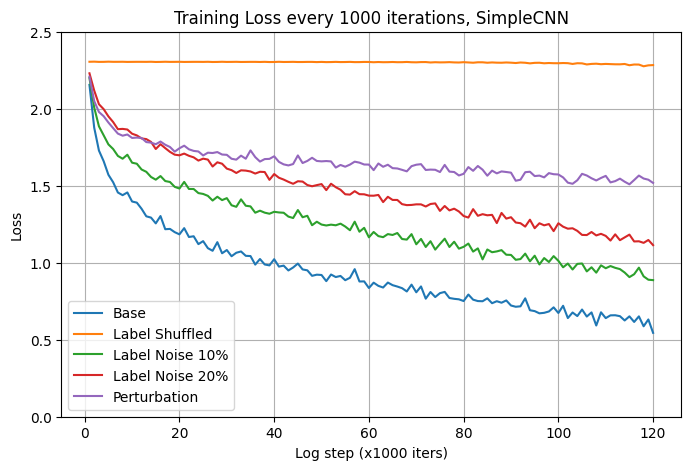

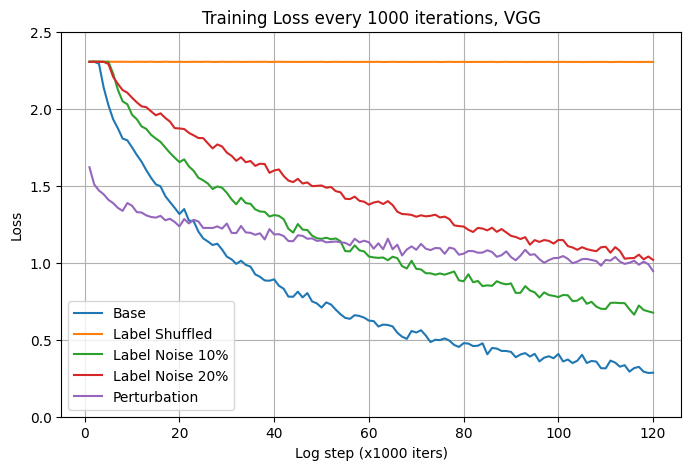

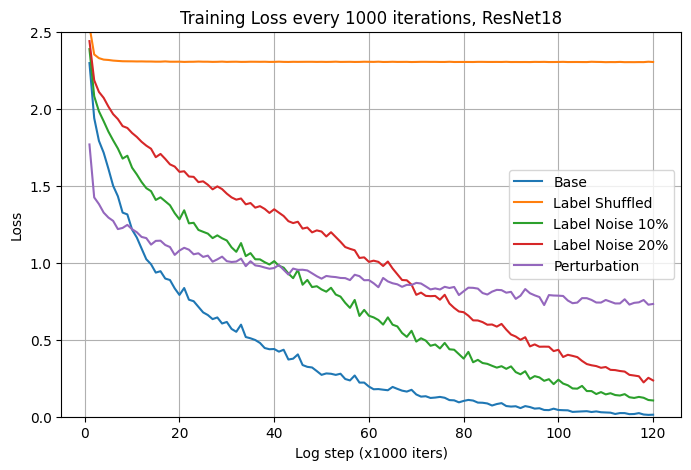

In [29]:
simplecnn_losses = [net1_loss_base, net1_loss_shuffled, net1_loss_random_10, net1_loss_random_20, net1_loss_perturbation]
vgg_losses = [net2_loss_base, net2_loss_shuffled, net2_loss_random_10, net2_loss_random_20, net2_loss_perturbation]
resnet_losses = [net3_loss_base, net3_loss_shuffled, net3_loss_random_10, net3_loss_random_20, net3_loss_perturbation]
experiment_labels = ['Base', 'Label Shuffled', 'Label Noise 10%', 'Label Noise 20%', 'Perturbation']

draw_loss_graph_1000_iters('Training Loss every 1000 iterations, SimpleCNN', simplecnn_losses, experiment_labels)
draw_loss_graph_1000_iters('Training Loss every 1000 iterations, VGG', vgg_losses, experiment_labels)
draw_loss_graph_1000_iters('Training Loss every 1000 iterations, ResNet18', resnet_losses, experiment_labels)